**A Support Vector Machine (SVM)** is a powerful supervised machine learning algorithm used for classification and regression tasks. It finds a hyperplane that best separates data into different classes by maximizing the margin between the classes. SVM works by identifying support vectors, data points closest to the decision boundary, and constructs the hyperplane based on them. <br>--> It aims to maximize the margin, which increases the model's generalization and helps prevent overfitting. SVM can handle linear and nonlinear data by using different kernel functions like linear, polynomial, or radial basis function (RBF).<br>-->  It's effective for high-dimensional datasets and robust against overfitting with proper regularization. SVM is widely used in various fields due to its versatility and strong theoretical foundation in machine learning. <br>
--> in this we are going to ue sklearn iris flower's sepal and petal prediction using **SVM**. <br>
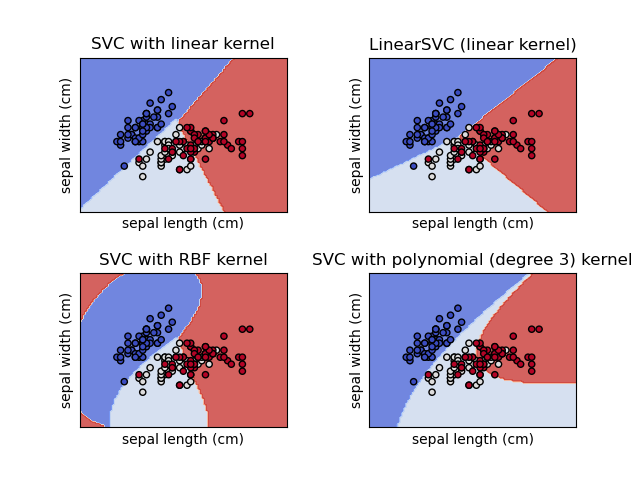

In [2]:
#importing required dependencies
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
from matplotlib import pyplot as plt

In [3]:
#describing features of dataset
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
#features names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
#converting into DataFrames to understand and view better
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
#adding a Target column
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
#looking at target names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df[df.target ==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [9]:
df['flower_names'] = df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [10]:
#creating new dataframes according to target names
df0 = df[df.target ==0]
df1 = df[df.target ==1]
df2 = df[df.target ==2]

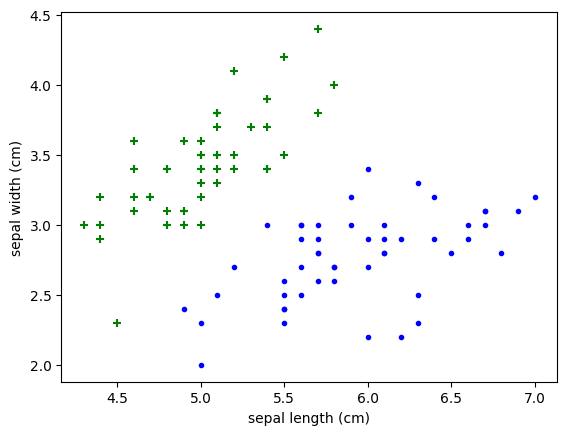

In [11]:
#visualizing data
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker = '+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker = '.')

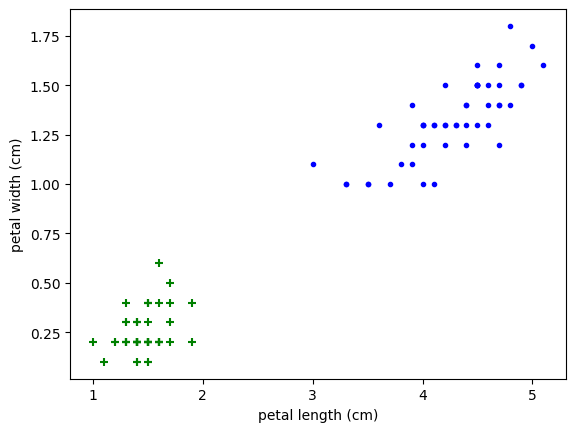

In [12]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker = '+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker = '.')

In [16]:
#importing SVM model
from sklearn.model_selection import train_test_split
X =df.drop(['target','flower_names'],axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
Y = df.target
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [19]:
#splitting data for Train and Test
X_train,X_test,y_train,y_test =train_test_split(X,Y, test_size=0.2)

In [20]:
len(X_test)

30

In [21]:
len(X_train)

120

In [37]:
#selecting model
from sklearn.svm import SVC
model = SVC()

In [38]:
#fitting model for training
model.fit(X_train,y_train)

SVC()

In [39]:
#checking model accuracy here it is 96.66%
model.score(X_test, y_test)

0.9666666666666667